In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
# Define Constants
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 128

In [12]:
# Set your dataset path
dataset_path = "Medicinal plant dataset"

In [13]:
# Create ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)


In [14]:
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

Found 4765 images belonging to 40 classes.


In [15]:
validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 1180 images belonging to 40 classes.


In [16]:

# Define CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(len(train_generator.class_indices), activation='softmax'))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)      

In [17]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)


Epoch 1/50


37/37 [==============================] - 267s 7s/step - loss: 3.7158 - accuracy: 0.0543 - val_loss: 3.3226 - val_accuracy: 0.1094
Epoch 2/50
37/37 [==============================] - 238s 6s/step - loss: 3.0047 - accuracy: 0.1896 - val_loss: 2.7134 - val_accuracy: 0.2405
Epoch 3/50
37/37 [==============================] - 241s 7s/step - loss: 2.5111 - accuracy: 0.2929 - val_loss: 2.4238 - val_accuracy: 0.3290
Epoch 4/50
37/37 [==============================] - 239s 6s/step - loss: 2.1254 - accuracy: 0.3959 - val_loss: 2.0604 - val_accuracy: 0.3845
Epoch 5/50
37/37 [==============================] - 239s 6s/step - loss: 1.8591 - accuracy: 0.4637 - val_loss: 1.8306 - val_accuracy: 0.4766
Epoch 6/50
37/37 [==============================] - 237s 6s/step - loss: 1.6341 - accuracy: 0.5206 - val_loss: 1.6383 - val_accuracy: 0.5026
Epoch 7/50
37/37 [==============================] - 238s 6s/step - loss: 1.4561 - accuracy: 0.5758 - val_loss: 1.6311 - val_accuracy: 0.5000
Epoch 8/50


In [19]:
scores = model.evaluate(validation_generator)

10/10 [==============================] - 40s 4s/step - loss: 1.1502 - accuracy: 0.7695


In [20]:
scores

[1.150161862373352, 0.7694915533065796]

In [21]:
history

In [28]:
model.save("leaves_iden.h5")

C:\Users\souvik\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

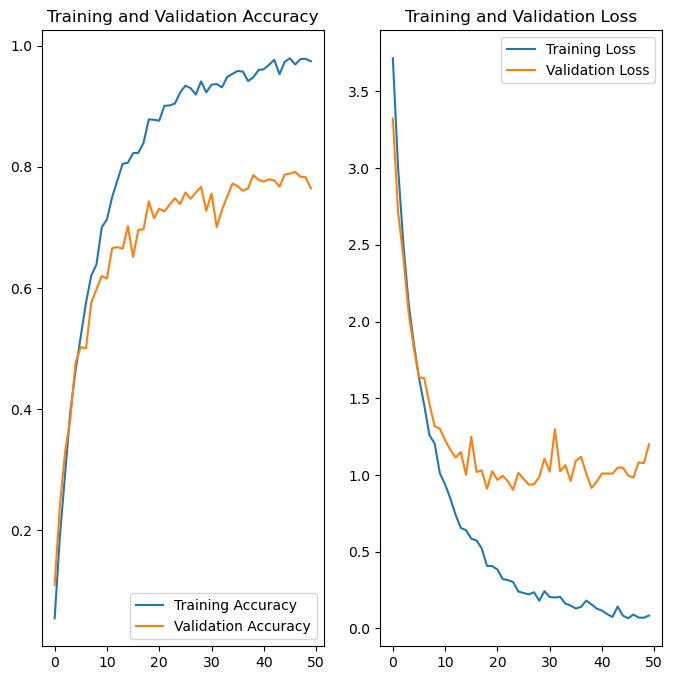

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(50), acc, label='Training Accuracy')
plt.plot(range(50), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(50), loss, label='Training Loss')
plt.plot(range(50), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [29]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the pre-trained model
model = load_model("leaves_iden.h5")

# Assuming your input image size is (224, 224) and you have a single image
img_path = "Medicinal plant dataset/Aloevera/339.jpg"  # Replace with the path to your input image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values to between 0 and 1

# Make predictions
predictions = model.predict(img_array)

# Display the predictions
print(predictions)


1/1 [==============================] - 0s 355ms/step
[[2.5933796e-01 8.7595645e-08 3.5750836e-07 1.8322629e-16 2.6152106e-24
  3.4517786e-18 4.2994974e-10 2.9623257e-16 2.8115441e-04 1.4987277e-08
  5.8011631e-07 3.0800024e-01 1.4175292e-06 7.8495761e-04 1.4927155e-21
  1.6801361e-07 2.8014917e-09 1.7527828e-11 5.7892987e-12 4.0315568e-01
  6.7893774e-07 2.1286578e-06 8.6624985e-16 4.1090202e-06 6.8058853e-10
  9.4968267e-10 2.7385683e-04 1.4324165e-08 2.0002528e-18 4.6853227e-08
  3.6371656e-10 2.8089171e-02 1.9522662e-07 3.6974596e-10 1.2911113e-09
  2.2233639e-17 4.5015375e-07 6.6632885e-05 1.9056957e-08 5.3235954e-08]]


1/1 [==============================] - 0s 223ms/step


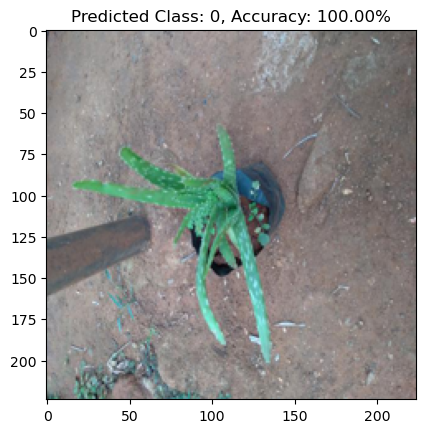

In [42]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the pre-trained model from the H5 file
model_path = 'leaves_iden.h5'  # Replace with the actual path
loaded_model = load_model(model_path)

# Assuming you have a test image for prediction
image_path = 'Medicinal plant dataset/Aloevera/339.jpg'  # Replace with the actual path
image = Image.open(image_path)
image = image.resize((224, 224))  # Adjust the size as per your model input requirements
image_array = np.array(image) / 255.0  # Normalize the image

# Expand dimensions to match the model's expected input shape
image_array = np.expand_dims(image_array, axis=0)

# Make predictions
predictions = loaded_model.predict(image_array)

# Get the predicted class (assuming a classification task)
predicted_class = np.argmax(predictions)

# Assuming you have ground truth labels for the test data
ground_truth_label = 0  # Replace with the actual ground truth label

# Calculate accuracy score
accuracy = accuracy_score([ground_truth_label], [predicted_class])

# Display the image
plt.imshow(image)
plt.title(f'Predicted Class: {predicted_class}, Accuracy: {accuracy:.2%}')
plt.show()


1/1 [==============================] - 0s 222ms/step


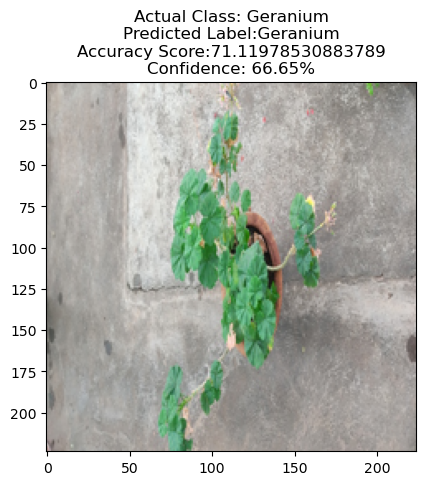

In [46]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the pre-trained model from the H5 file
model_path = 'leaves_iden.h5'  # Replace with the actual path
loaded_model = load_model(model_path)

# Assuming you have a test image for prediction
image_path = 'Medicinal plant dataset/Geranium/1041.jpg'  # Replace with the actual path
image = Image.open(image_path)
image = image.resize((224, 224))  # Adjust the size as per your model input requirements
image_array = np.array(image) / 255.0  # Normalize the image

# Expand dimensions to match the model's expected input shape
image_array = np.expand_dims(image_array, axis=0)

# Make predictions
predictions = loaded_model.predict(image_array)

# Get the predicted class (assuming a classification task)
predicted_class = np.argmax(predictions)

# Assuming you have a list of class names associated with the model
class_names = ['Aloevera','Amla','Amruta_Balli','Arali','Ashoka','Ashwagandha','Avacado','Bamboo','Basale','Betel','Betel_Nut','Brahmi','Castor','Curry_Leaf','Doddapatre','Ekka','Ganike','Gauva','Geranium','Henna','Hibiscus','Honge','Insulin','Jasmine','Lemon','Lemon_grass','Mango','Mint','Nagadali','Neem','Nithyapushpa','Nooni','Pappaya','Pepper','Pomegranate','Raktachandini','Rose','Sapota','Tulasi','Wood_sorel']  # Replace with your actual class names

# Get the predicted class name
predicted_class_name = class_names[predicted_class]
confidence_score = predictions[0, predicted_class]

# Display the image
plt.imshow(image)
plt.title(f'Actual Class: {predicted_class_name}\nPredicted Label:{predicted_class_name}\nAccuracy Score:{accuracy_score}\nConfidence: {confidence_score:.2%}')
plt.show()

# Calculate a pseudo "accuracy score" based on the confidence of the predicted class
accuracy_score = confidence_score * 100  # Scale confidence to be in percentage




In [41]:
import os
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Path to the folder containing test images
test_folder = 'Medicinal plant dataset'  # Replace with the actual path
class_names = sorted(os.listdir(test_folder))

# Lists to store ground truth and predicted labels
ground_truth_labels = []
predicted_labels = []

# Iterate over test images
for class_name in class_names:
    class_path = os.path.join(test_folder, class_name)
    
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        image = Image.open(image_path)
        image = image.resize((224, 224))  # Adjust the size as per your model input requirements
        image_array = np.array(image) / 255.0  # Normalize the image

        # Expand dimensions to match the model's expected input shape
        image_array = np.expand_dims(image_array, axis=0)

        # Make predictions
        predictions = loaded_model.predict(image_array)
        predicted_class = np.argmax(predictions)

        # Get the ground truth label based on the folder structure
        ground_truth_label = class_names.index(class_name)

        # Store ground truth and predicted labels
        ground_truth_labels.append(ground_truth_label)
        predicted_labels.append(predicted_class)

# Calculate accuracy score
accuracy = accuracy_score(ground_truth_labels, predicted_labels)
print(f'Accuracy: {accuracy:.2%}')

# Generate and print the classification report
class_report = classification_report(ground_truth_labels, predicted_labels, target_names=class_names)
print('Classification Report:')
print(class_report)


1/1 [==============================] - 0s 74ms/step


1/1 [==============================] - 0s 80ms/step


1/1 [==============================] - 0s 89ms/step


1/1 [==============================] - 0s 69ms/step


1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 77ms/step


1/1 [==============================] - 0s 95ms/step


1/1 [==============================] - 0s 74ms/step


1/1 [==============================] - 0s 74ms/step


1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 69ms/step


1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 69ms/step


1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 67ms/step


1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 80ms/step


1/1 [==============================] - 0s 77ms/step


1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 87ms/step


1/1 [==============================] - 0s 80ms/step


1/1 [==============================] - 0s 81ms/step


1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 83ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 73ms/step


1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 81ms/step


1/1 [==============================] - 0s 68ms/step


1/1 [==============================] - 0s 92ms/step
Accuracy: 94.63%
Classification Report:
               precision    recall  f1-score   support

     Aloevera       0.93      0.96      0.94       164
         Amla       0.93      0.98      0.96       146
 Amruta_Balli       0.93      0.85      0.89       146
        Arali       0.99      0.97      0.98       146
       Ashoka       0.97      0.99      0.98       146
  Ashwagandha       1.00      0.95      0.97       146
      Avacado       0.95      0.95      0.95       146
       Bamboo       0.97      0.99      0.98       146
       Basale       0.83      0.95      0.88       146
        Betel       0.90      0.97      0.93       151
    Betel_Nut       0.95      0.98      0.97       146
       Brahmi       0.96      0.99      0.98       146
       Castor       0.91      0.90      0.91       160
   Curry_Leaf       0.92      0.97      0.94       146
   Doddapatre       0.99      0.99      0.99       146
         Ekka       1.00   

In [48]:
conf_matrix = confusion_matrix(ground_truth_labels,predicted_labels)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[157   0   0 ...   0   1   0]
 [  0 143   0 ...   2   0   0]
 [  0   1 124 ...   0   1   0]
 ...
 [  0   1   0 ... 134   0   0]
 [  1   1   0 ...   0 136   0]
 [  0   0   0 ...   0   0 144]]


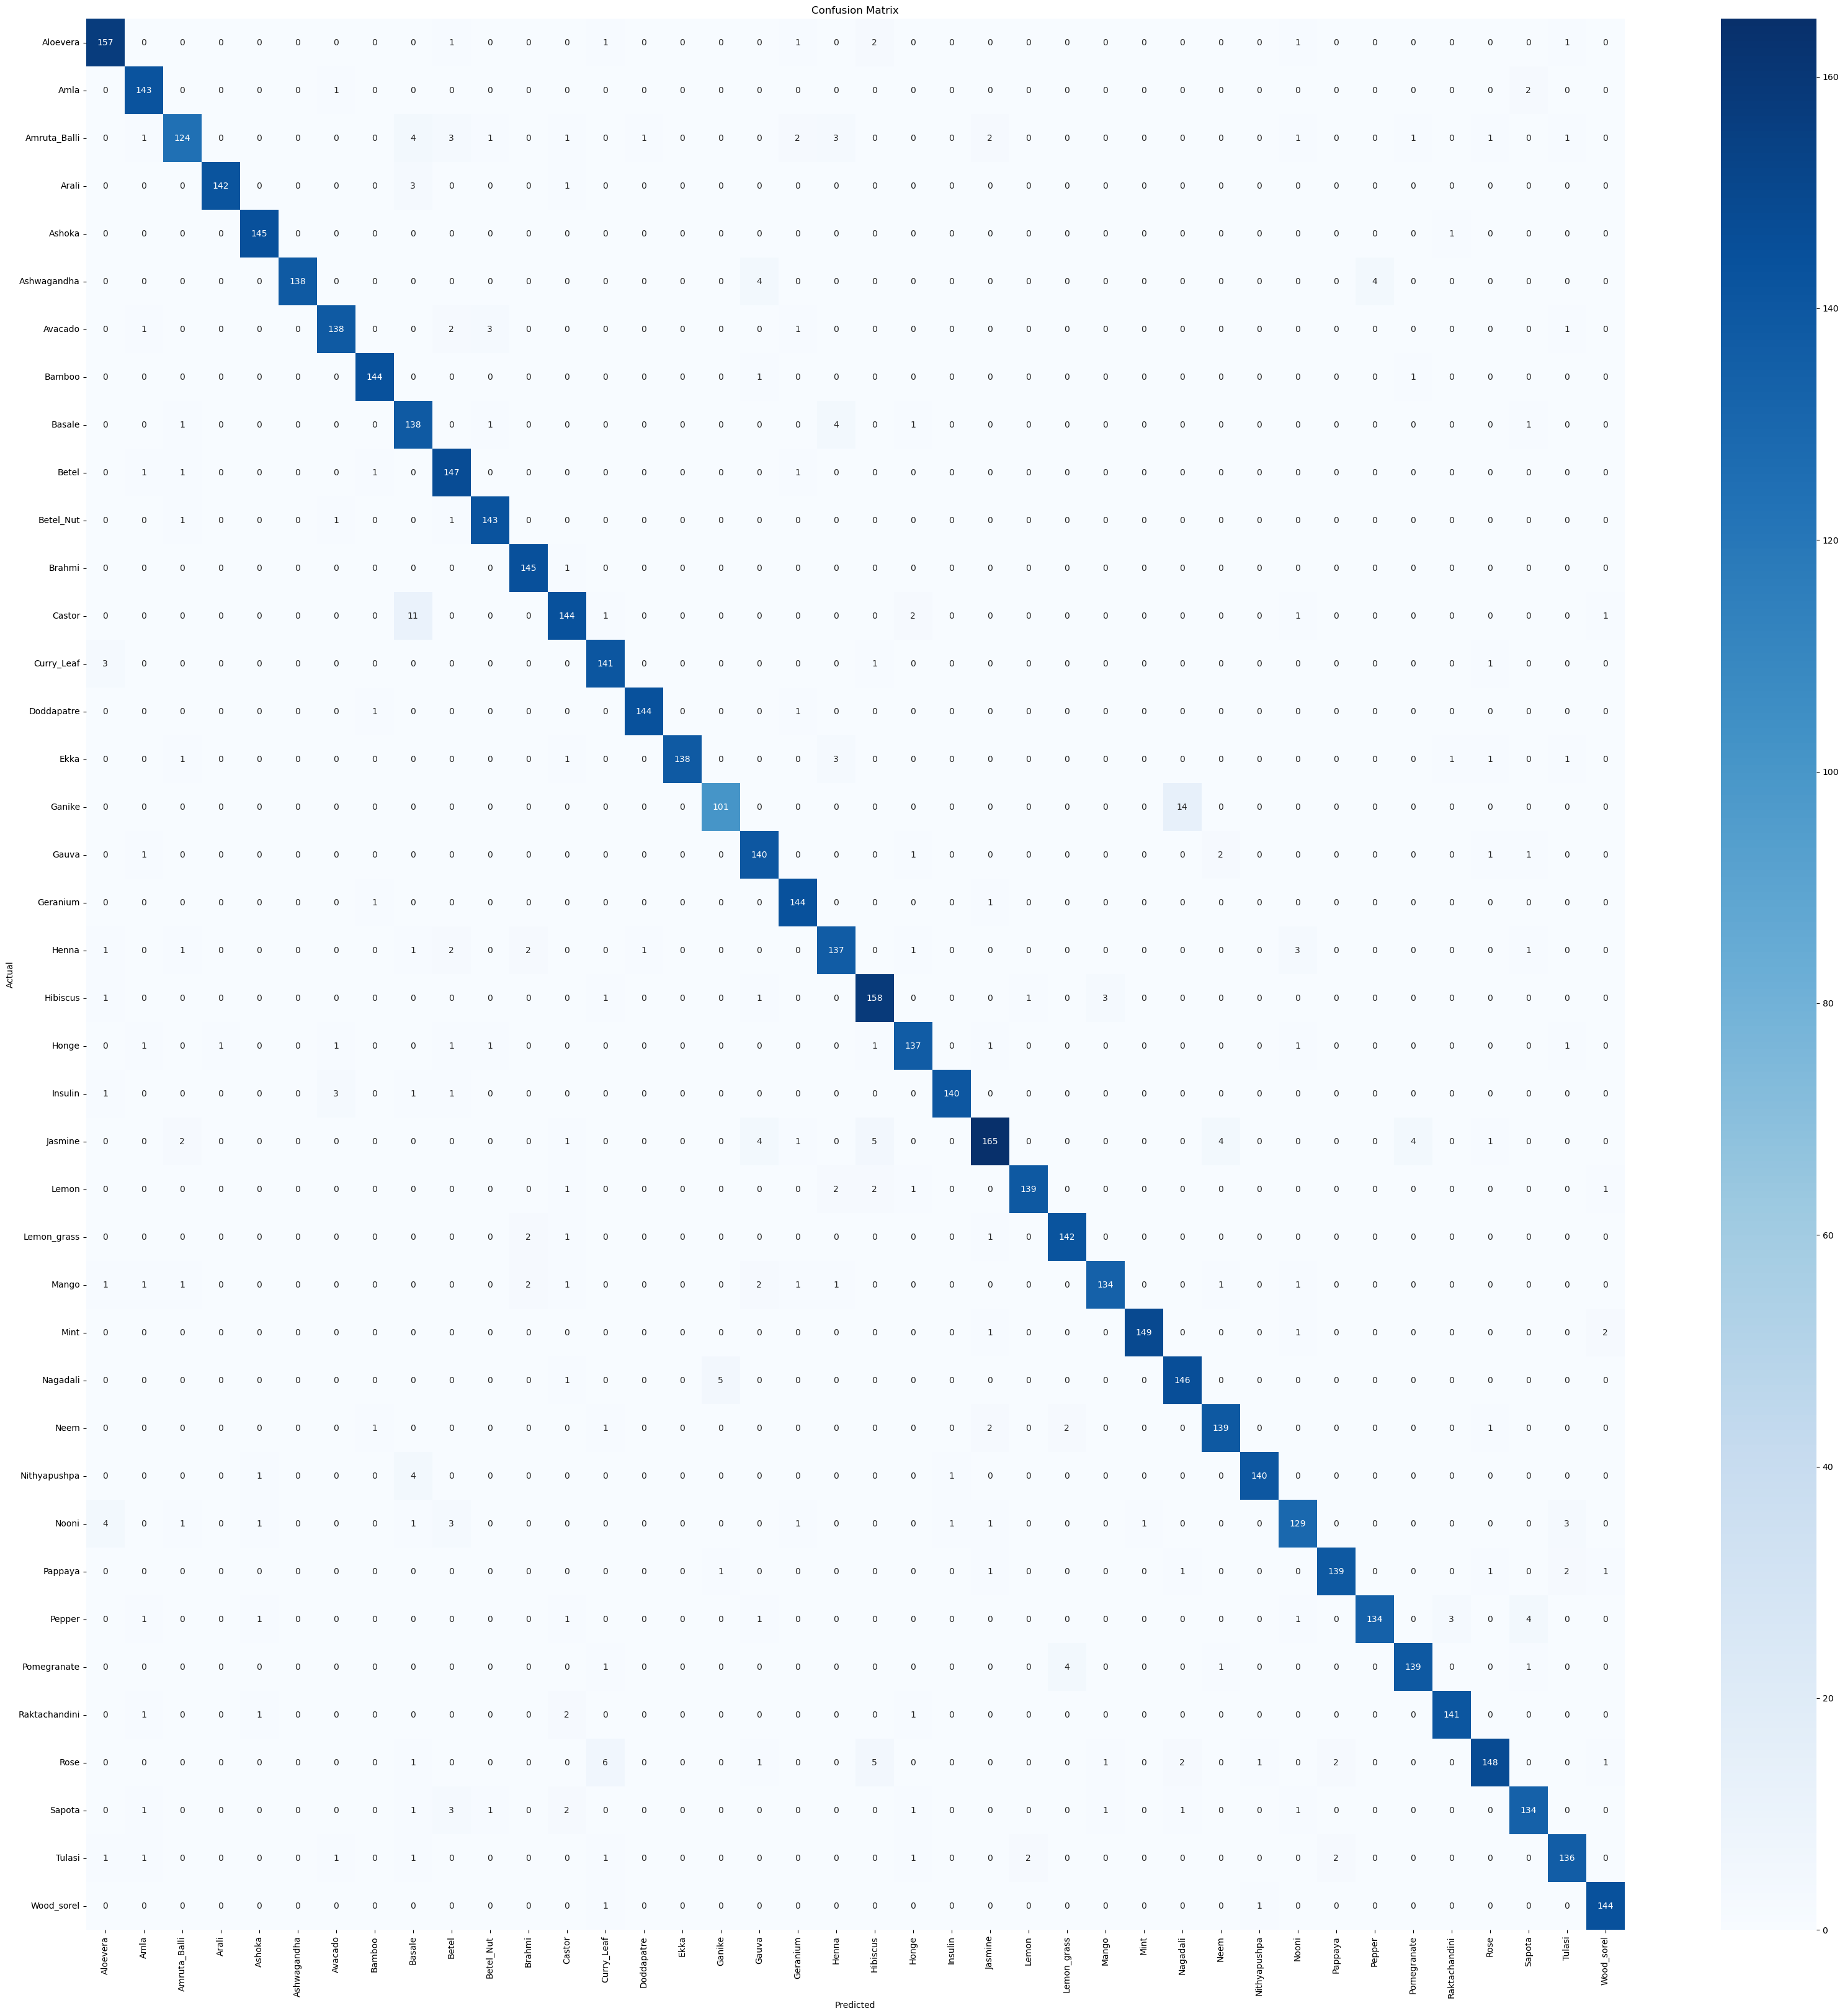

In [53]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from PIL import Image
plt.figure(figsize=(len(class_names), len(class_names)))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()